In [1]:
headers2 = read.csv(file="sargento-meteo_14-18.csv", header = F, nrows = 1, as.is = T)
df_dist2 = read.csv(file="sargento-meteo_14-18.csv", skip = 3, header = F, stringsAsFactors=FALSE)
colnames(df_dist2)= headers2

In [3]:
require(lubridate)
df_dist2$NewDate <- as.POSIXct(paste0(df_dist2$TIMESTAMP, df_dist2$RECORD),format="%d/%m/%Y %H:%M")
df_dist2$NMonth <- factor(month(df_dist2$NewDate), 
                          labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

In [5]:
require(dplyr)

df_meteo2014 <- filter(df_dist2, year(NewDate) == 2014)

df_meteo2014 <- filter(df_meteo2014, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2014 <- df_meteo2014[-1, ]

df_meteo2015 <- filter(df_dist2, year(NewDate) == 2015)

df_meteo2015 <- filter(df_meteo2015, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2015 <- df_meteo2015[-1, ]

df_meteo2016<- filter(df_dist2, year(NewDate) == 2016)

df_meteo2016 <- filter(df_meteo2016, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2016 <- df_meteo2016[-1, ]

df_meteo2017 <- filter(df_dist2, year(NewDate) == 2017)

df_meteo2017 <- filter(df_meteo2017, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2017 <- df_meteo2017[-1, ]

df_meteo2018 <- filter(df_dist2, year(NewDate) == 2018)

df_meteo2018 <- filter(df_meteo2018, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2018 <- df_meteo2018[-1, ]


In [6]:
df_met2014 <- subset(df_meteo2014, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_met2014) <- c("Date", "Month", "NetRad", "AirTemp")
df_met2014$doy <- yday(df_met2014$Date)

df_met2015 <- subset(df_meteo2015, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_met2015) <- c("Date", "Month", "NetRad", "AirTemp")
df_met2015$doy <- yday(df_met2015$Date)

df_met2016 <- subset(df_meteo2016, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_met2016) <- c("Date", "Month", "NetRad", "AirTemp")
df_met2016$doy <- yday(df_met2016$Date)

df_met2017 <- subset(df_meteo2017, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_met2017) <- c("Date", "Month", "NetRad", "AirTemp")
df_met2017$doy <- yday(df_met2017$Date)

df_met2018 <- subset(df_meteo2018, select=c("NewDate", "NMonth", "NR_Wm2_Avg", "AirTC_Avg" ))
names(df_met2018) <- c("Date", "Month", "NetRad", "AirTemp")
df_met2018$doy <- yday(df_met2018$Date)

In [8]:
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)
library(cowplot)

In [10]:
library(plyr)
require(TTR)

SolarIrrad4b <- ddply(.data = df_met2014, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))

vec <- which(!complete.cases(SolarIrrad4b))  # rows 2305 2398
SolarIrrad4 <- SolarIrrad4b[-vec, ]

#        Datum sum_precip
SolarIrrad4$EMA_sum_DailyRad <- EMA(SolarIrrad4$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad4) <- c("doy", "DailyRad", "EMA_DailyRad")

SolarIrrad5 <- ddply(.data = df_met2015, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))
#        Datum sum_precip
SolarIrrad5$EMA_sum_DailyRad <- EMA(SolarIrrad5$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad5) <- c("doy", "DailyRad", "EMA_DailyRad")

SolarIrrad6 <- ddply(.data = df_met2016, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))
#        Datum sum_precip
SolarIrrad6$EMA_sum_DailyRad <- EMA(SolarIrrad6$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad6) <- c("doy", "DailyRad", "EMA_DailyRad")

SolarIrrad7 <- ddply(.data = df_met2017, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))
#        Datum sum_precip
SolarIrrad7$EMA_sum_DailyRad <- EMA(SolarIrrad7$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad7) <- c("doy", "DailyRad", "EMA_DailyRad")

SolarIrrad8 <- ddply(.data = df_met2018, .variables = .(yday(Date)), summarize,
      sum_DailyRad = sum(NetRad))
#        Datum sum_precip
SolarIrrad8$EMA_sum_DailyRad <- EMA(SolarIrrad8$sum_DailyRad, n=7, ratio=2/(5+1))
names(SolarIrrad8) <- c("doy", "DailyRad", "EMA_DailyRad")

Warning message:
"Removed 6 rows containing missing values (geom_path)."

Warning message:
"Removed 6 rows containing missing values (geom_path)."

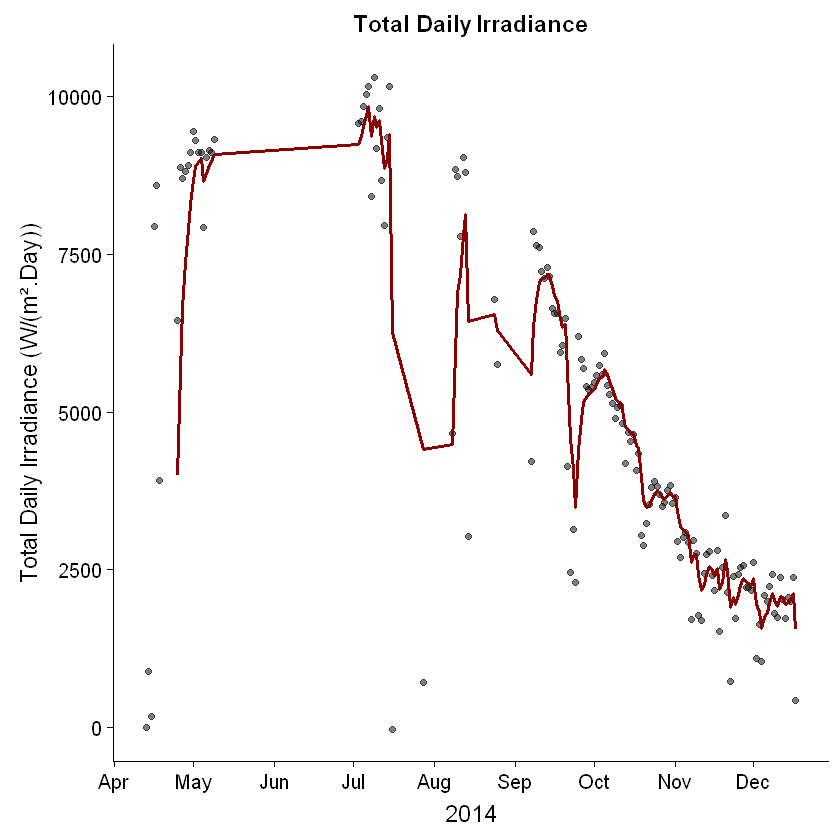

Warning message:
"Removed 6 rows containing missing values (geom_path)."

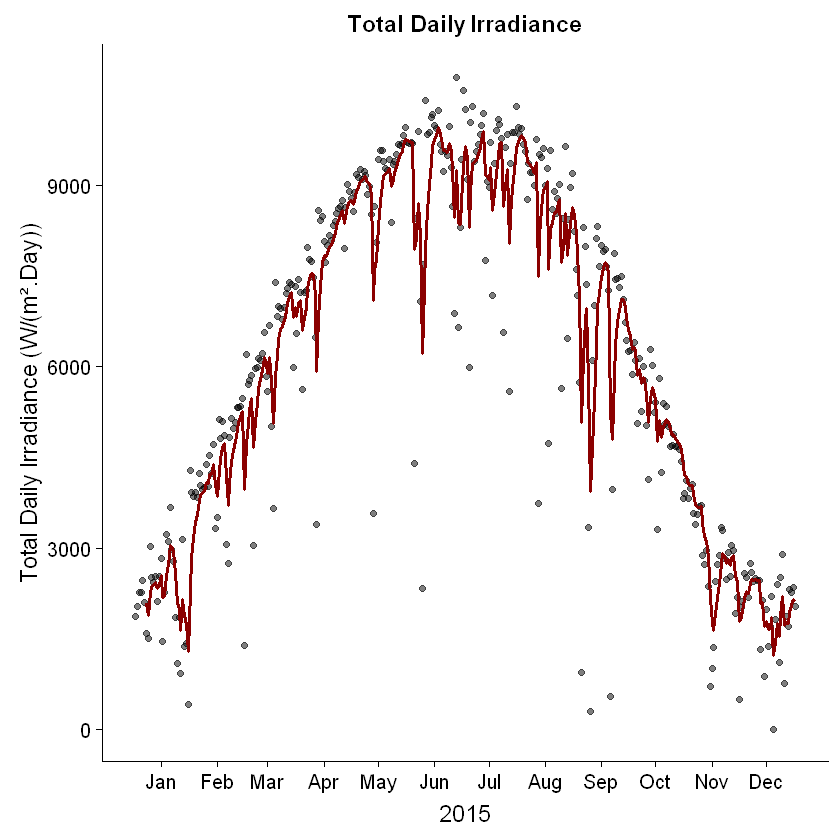

Warning message:
"Removed 6 rows containing missing values (geom_path)."

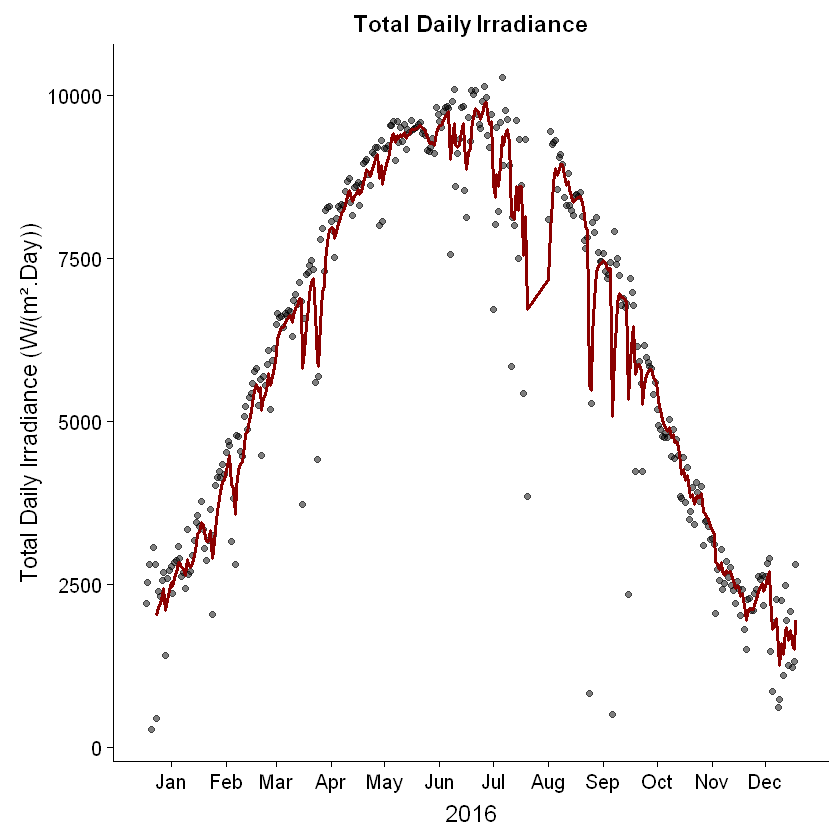

Warning message:
"Removed 6 rows containing missing values (geom_path)."

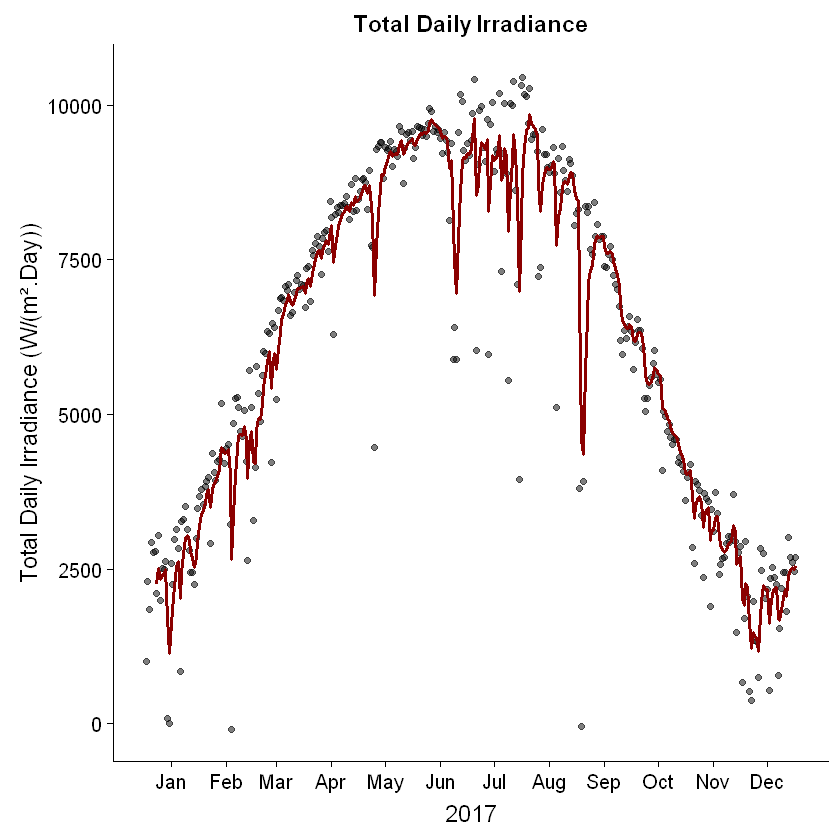

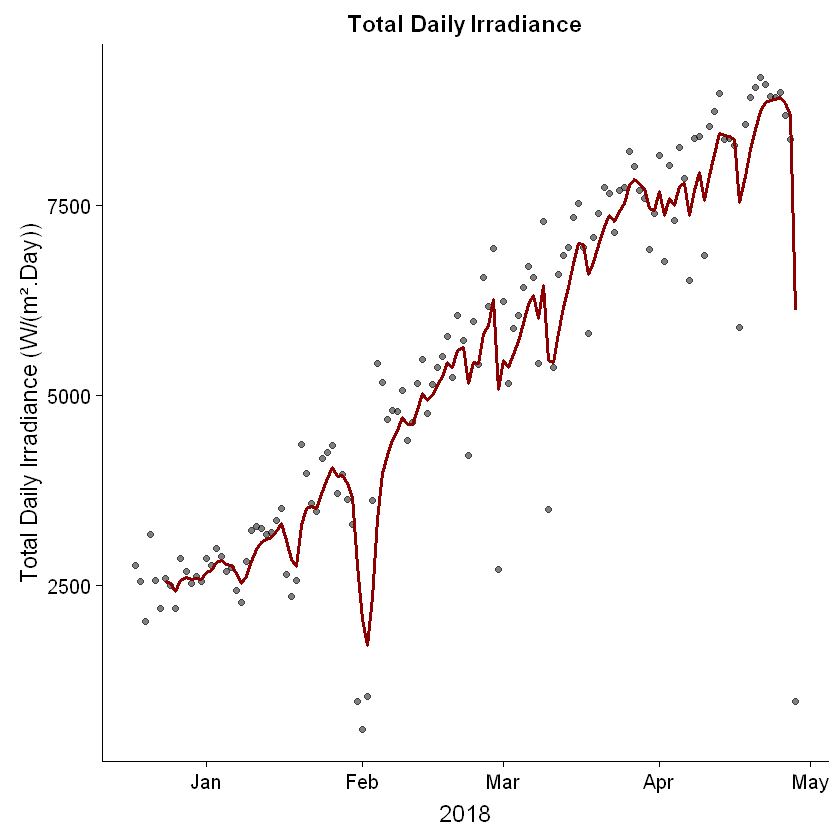

In [11]:
p4 <- ggplot(SolarIrrad4, aes(x = doy)) +  ggtitle ("Total Daily Irradiance")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p4 <- p4 + geom_point(data=SolarIrrad4, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad4, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="2014", y="Total Daily Irradiance (W/(m².Day))")

p4

p5 <- ggplot(SolarIrrad5, aes(x = doy)) + ggtitle ("Total Daily Irradiance")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p5 <- p5 + geom_point(data=SolarIrrad5, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad5, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="2015", y="Total Daily Irradiance (W/(m².Day))")

p5


p6 <- ggplot(SolarIrrad6, aes(x = doy)) + ggtitle ("Total Daily Irradiance")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p6 <- p6 + geom_point(data=SolarIrrad6, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad6, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="2016", y="Total Daily Irradiance (W/(m².Day))")

p6


p7 <- ggplot(SolarIrrad7, aes(x = doy)) + ggtitle ("Total Daily Irradiance")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p7 <- p7 + geom_point(data=SolarIrrad7, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad7, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="2017", y="Total Daily Irradiance (W/(m².Day))")

p7


p8 <- ggplot(SolarIrrad8, aes(x = doy)) + ggtitle ("Total Daily Irradiance")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
p8 <- p8 + geom_point(data=SolarIrrad8, aes(y=DailyRad), alpha = 1/2) +
       geom_line(data=SolarIrrad8, aes(y=EMA_DailyRad), color='red4', size=1) +
       labs(x="2018", y="Total Daily Irradiance (W/(m².Day))")

p8

In [12]:
# Average daily temperature
library(plyr)
require(TTR)

df_DailyTemp4 <- ddply(.data = df_met2014, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
#        Datum sum_precip
df_DailyTemp4$EMA_ave_airTemp <- EMA(df_DailyTemp4$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp4) <- c("doy", "DailyTemp", "EMA_DailyTemp")

df_DailyTemp5 <- ddply(.data = df_met2015, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
#        Datum sum_precip
df_DailyTemp5$EMA_ave_airTemp <- EMA(df_DailyTemp5$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp5) <- c("doy", "DailyTemp", "EMA_DailyTemp")

df_DailyTemp6 <- ddply(.data = df_met2016, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
#        Datum sum_precip
df_DailyTemp6$EMA_ave_airTemp <- EMA(df_DailyTemp6$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp6) <- c("doy", "DailyTemp", "EMA_DailyTemp")

df_DailyTemp7 <- ddply(.data = df_met2017, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
#        Datum sum_precip
df_DailyTemp7$EMA_ave_airTemp <- EMA(df_DailyTemp7$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp7) <- c("doy", "DailyTemp", "EMA_DailyTemp")

df_DailyTemp8 <- ddply(.data = df_met2018, .variables = .(yday(Date)), summarize,
      ave_AirTemp = mean(AirTemp))
#        Datum sum_precip
df_DailyTemp8$EMA_ave_airTemp <- EMA(df_DailyTemp8$ave_AirTemp, n=7, ratio=2/(5+1))
names(df_DailyTemp8) <- c("doy", "DailyTemp", "EMA_DailyTemp")

Warning message:
"Removed 6 rows containing missing values (geom_path)."

Warning message:
"Removed 6 rows containing missing values (geom_path)."

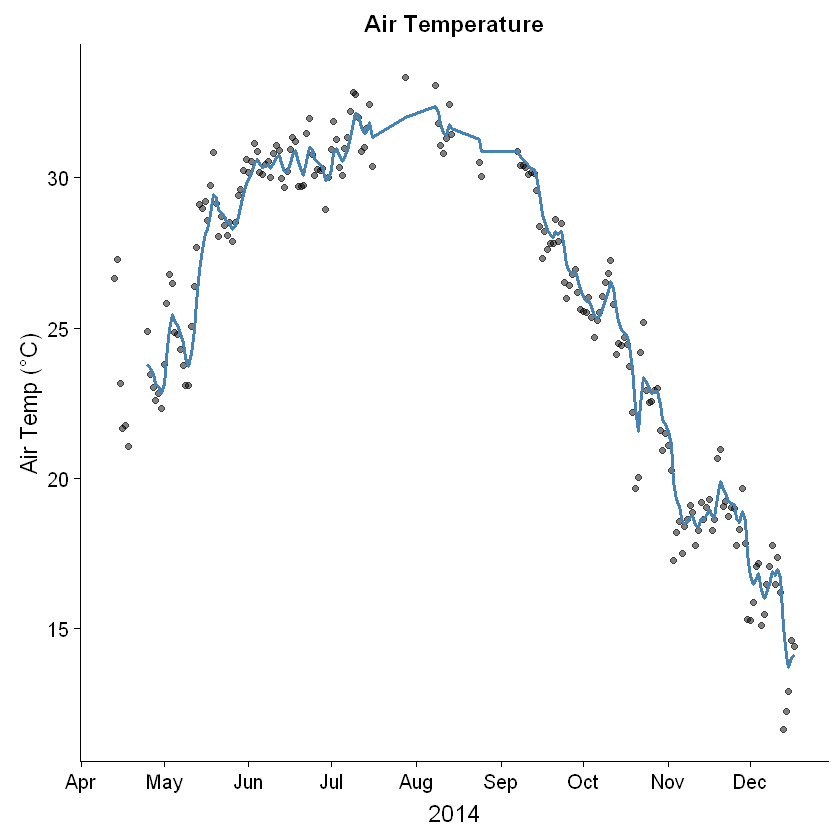

Warning message:
"Removed 6 rows containing missing values (geom_path)."

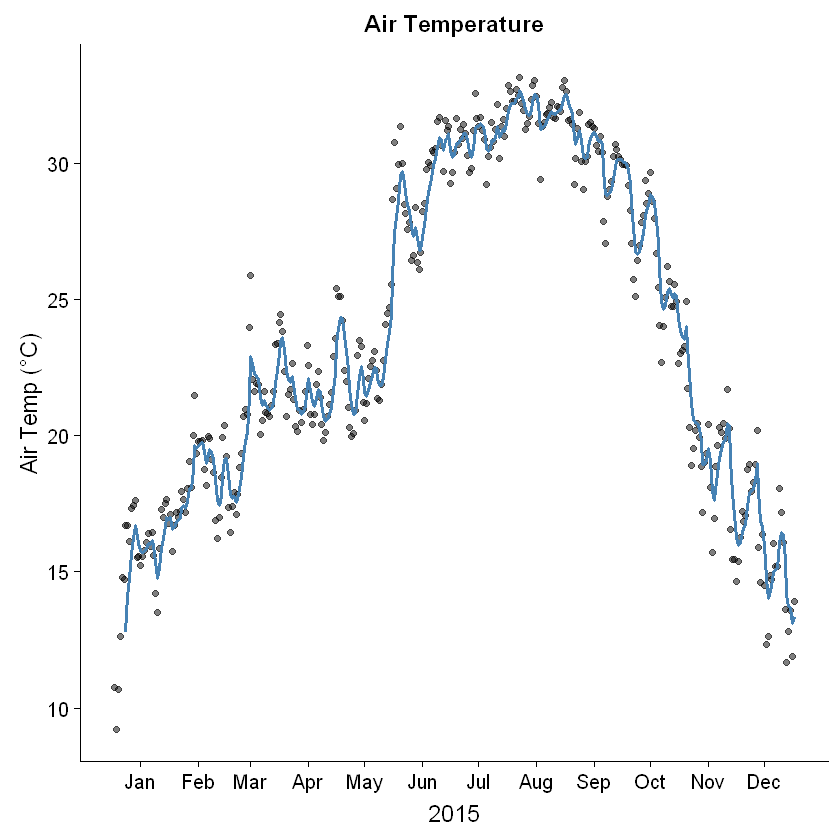

Warning message:
"Removed 6 rows containing missing values (geom_path)."

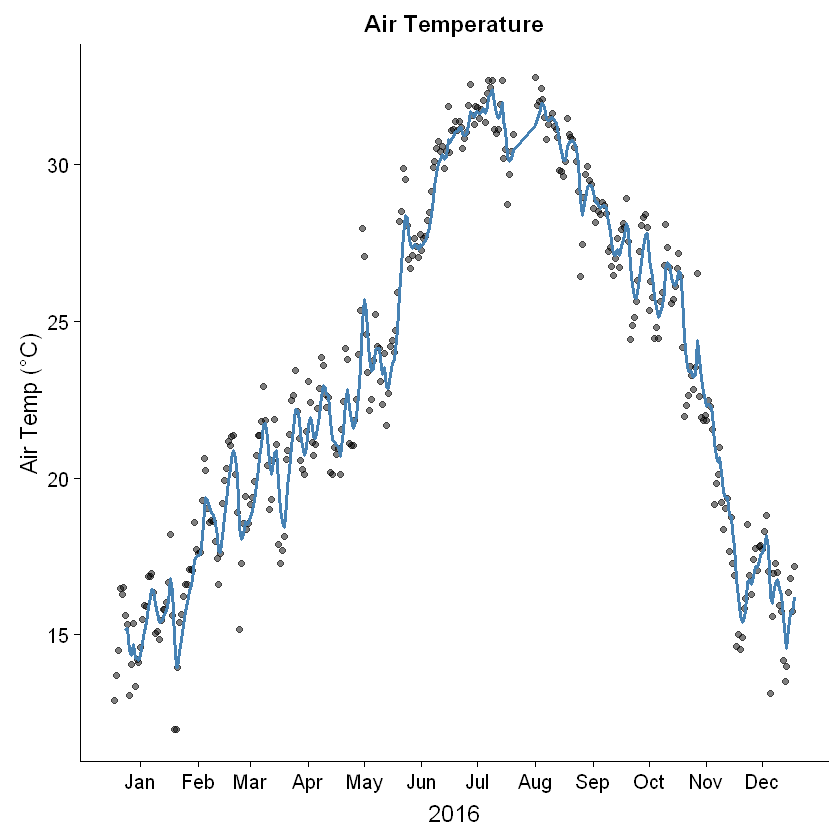

Warning message:
"Removed 6 rows containing missing values (geom_path)."

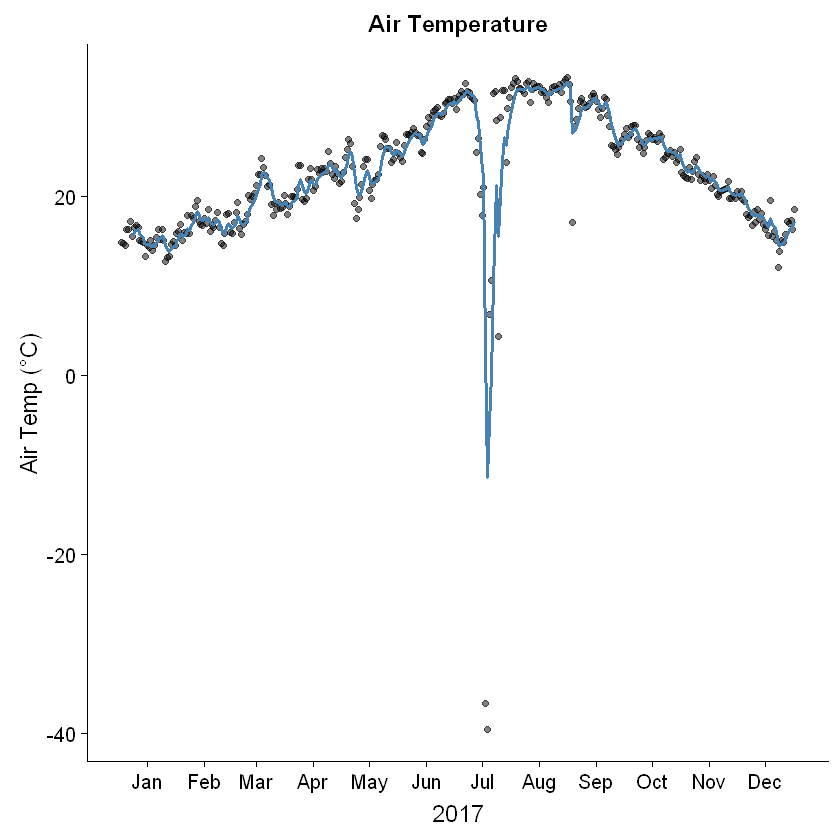

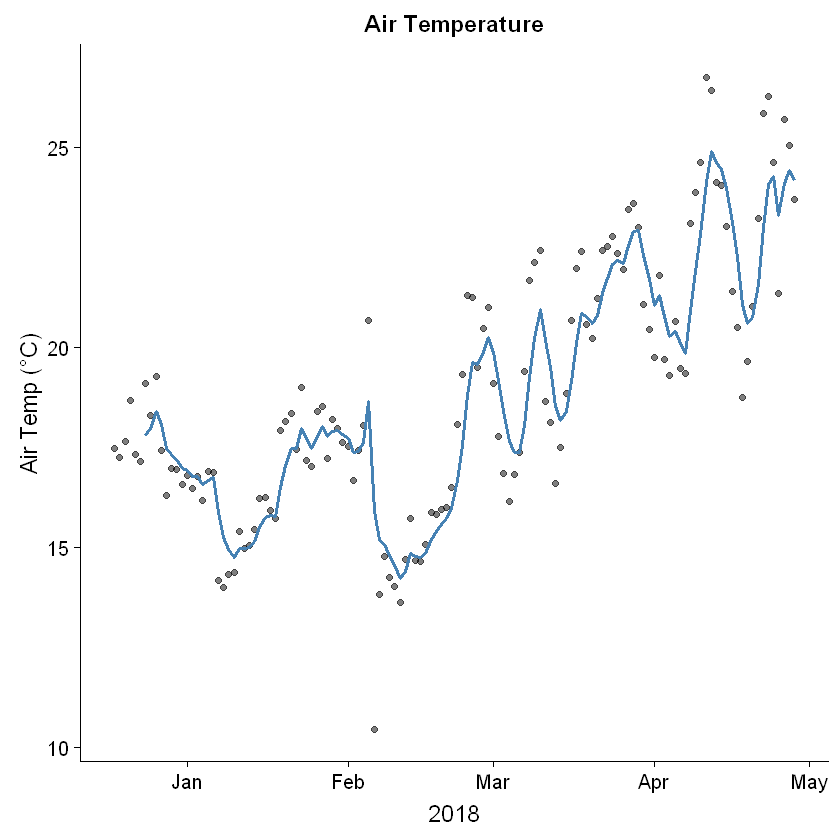

In [13]:
q4 <- ggplot(df_DailyTemp4, aes(x = doy)) + ggtitle ("Air Temperature")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q4 <- q4 + geom_point(data=df_DailyTemp4, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp4, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="2014", y="Air Temp (°C)")
q4

q5 <- ggplot(df_DailyTemp5, aes(x = doy)) + ggtitle ("Air Temperature")+ 
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q5 <- q5 + geom_point(data=df_DailyTemp5, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp5, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="2015", y="Air Temp (°C)")
q5

q6 <- ggplot(df_DailyTemp6, aes(x = doy)) + ggtitle ("Air Temperature")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q6 <- q6 + geom_point(data=df_DailyTemp6, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp6, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="2016", y="Air Temp (°C)")
q6

q7 <- ggplot(df_DailyTemp7, aes(x = doy)) + ggtitle ("Air Temperature")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q7 <- q7 + geom_point(data=df_DailyTemp7, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp7, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="2017", y="Air Temp (°C)")
q7

q8 <- ggplot(df_DailyTemp8, aes(x = doy)) + ggtitle ("Air Temperature")+
     scale_x_continuous(breaks=c(15,46,74,105,135,166,196,227,258,288,319,349),
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                 "Aug", "Sep", "Oct", "Nov", "Dec"))
q8 <- q8 + geom_point(data=df_DailyTemp8, aes(y=DailyTemp), alpha = 1/2) +
       geom_line(data=df_DailyTemp8, aes(y=EMA_DailyTemp), color='steelblue', size=1) +
       labs(x="2018", y="Air Temp (°C)")
q8